# Ensemble Learning 

In this notebook, we briefly introduce four main ensemble learning algorithms, then apply the algorithms seperately on palm penguins dataset.


## Introduction 

**Ensemble methods** are machine learning methods that aggregate the predictions of a group of base learners in order to form a single learning model.

In this notebook we will consider four types of ensemble concepts and methods. Namely, 
1. **Bagging**

2. **Random Forests**

3. **AdaBoost**

4. **gradient boosting**

## Bagging

The term **bagging** referes to **b**ootstrap **agg**regating. **Bootstrapping** is a method of inferring results for a population from results found on a collection of smaller random samples of that population, using replacement during the sampling process. In the context of machine learning, a given set of machine learning model is trained respectively on random samples of training data with replacement (see the above figure), then the combined predictions of each model is **aggregated** and used as a single prediction. For regression tasks this would mean taking the average of the set of model prediction, and for classification taking the majority vote.  

Generally speaking, the models we pick for ensembling will be "dumb learners", meaning models that are barely superior to randomly guessing. Individually the models will perform poorly, but collectively will perform well. 

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the statistical mode for classification, or the average for regression. Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance.

To illustrate this concept we will once again consider the palm penguin dataset; and compare the performance between a single decision tree model and a bagging classifier of many depth 1 decision trees, referred to as *decision stumps*. Run the following code cell to load the iris dataset and visualize the data. 

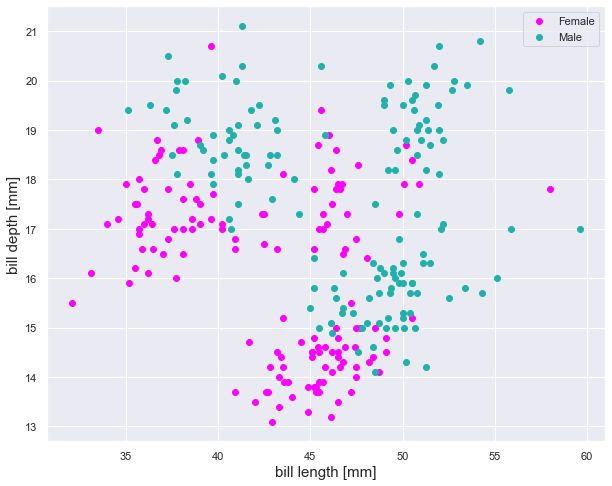

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("./Datasets/palmer_penguins.csv")
df = df.iloc[50:]

X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Female":
        return 0
    else:
        return 1
         
# Create target value array
y = df["sex"].map(make_labels).to_numpy()

# Plot the data
sex = ["Female", "Male"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for gender, color in zip(sex, colors):
    temp_df = df[df.sex == gender]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = gender, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

As you can tell, no one model would ever hope to learn seperation on this dataset. Let us next compare a decision tree. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.81      0.31      0.45        55
           1       0.59      0.93      0.72        59

    accuracy                           0.63       114
   macro avg       0.70      0.62      0.59       114
weighted avg       0.70      0.63      0.59       114
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        55
           1       0.80      0.80      0.80        59

    accuracy                           0.79       114
   macro avg       0.79      0.79      0.79       114
weighted avg       0.79      0.79      0.79       114
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        55
           1       0.83      0.75      0.79        59

    accuracy                           0.79       114
   macro avg       0.79      0.79      

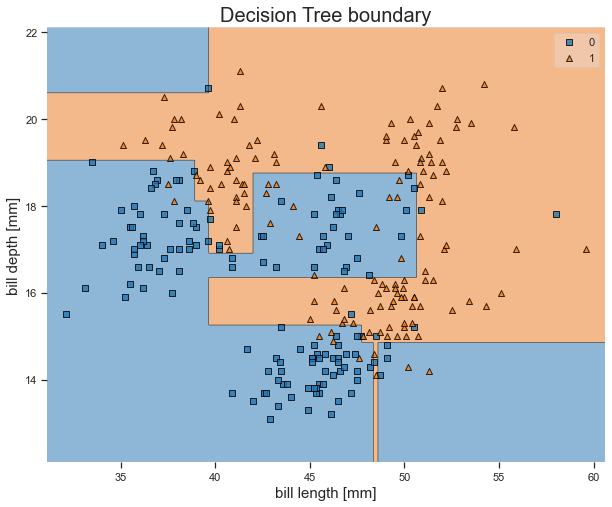

In [3]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Decision Tree boundary", fontsize = 20)
plt.grid()
plt.show()

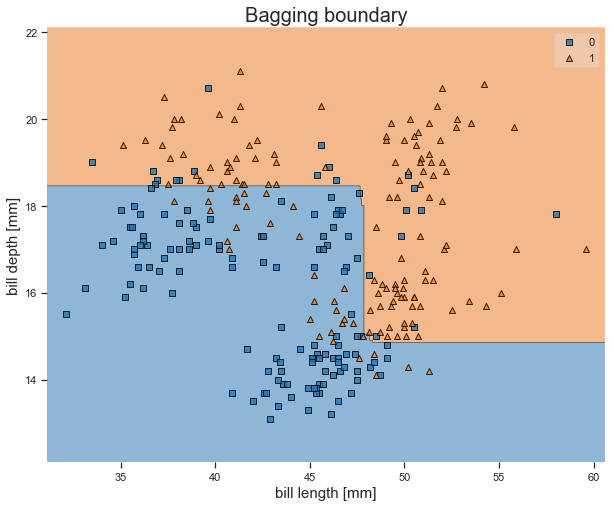

In [4]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Bagging boundary", fontsize = 20)
plt.grid()
plt.show()

----

## Random Forests 
Technically speaking, the above bagging model is called a **Random forest**. Such a model exists inside the ```sklearn.ensemble``` module, and is the ```DecisionTreeClassifier``` class. However, the random forest algorithm used in training the ```RandomForestClassifier``` class introduces extra randomness when growing trees; instead of searching for the best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater diversity of trees which results in even lower variance of the fit model. 


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        55
           1       0.80      0.83      0.82        59

    accuracy                           0.81       114
   macro avg       0.81      0.81      0.81       114
weighted avg       0.81      0.81      0.81       114
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        55
           1       0.83      0.75      0.79        59

    accuracy                           0.79       114
   macro avg       0.79      0.79      0.79       114
weighted avg       0.79      0.79      0.79       114
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        55
           1       0.83      0.75      0.79        59

    accuracy                           0.79       114
   macro avg       0.79      0.79     

As obserbed in the output of the above code cell, the accuracy of the bagging classifier with decision stumps and the random forest are the same. However, in theory the random forest model will have less variance than the random forest. Another way we can compare these two models with identical accuracy is to view the decision regions generated by the. Let's next do this by running the following three code cells. 

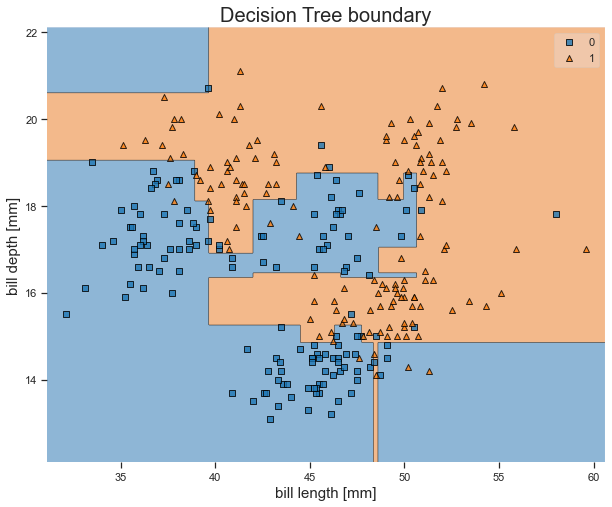

In [6]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Decision Tree boundary", fontsize = 20)
plt.grid()
plt.show()

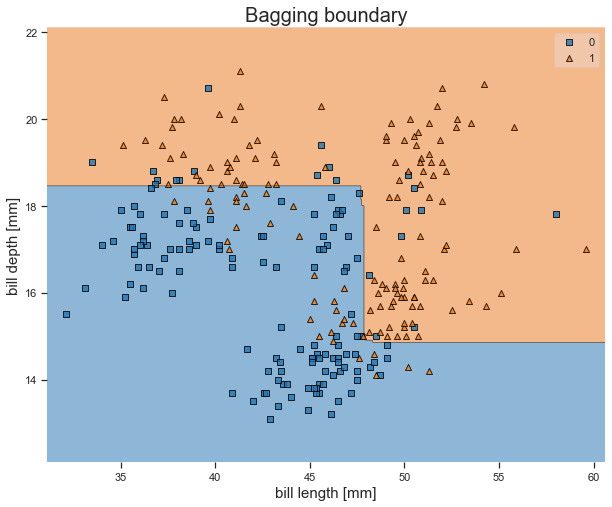

In [7]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Bagging boundary", fontsize = 20)
plt.grid()
plt.show()

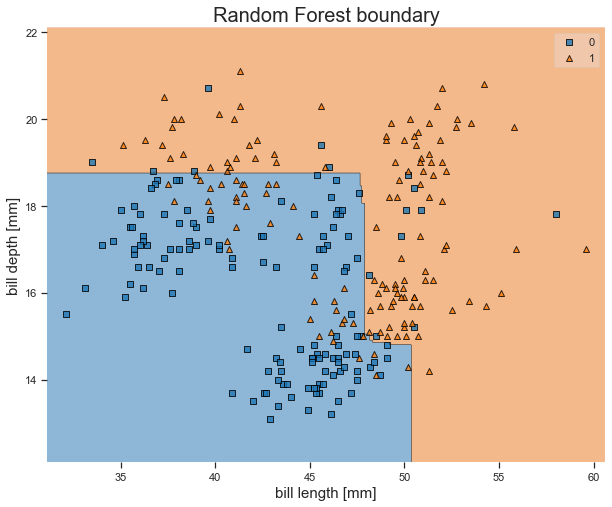

In [8]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Random Forest boundary", fontsize = 20)
plt.grid()
plt.show()

It may be the case that we can improve the performance of all three models by considering more features in the dataset. With this in mind, let's consider these three models on all 4 features of the dataset. This can be done by running the following code cell. 

In [9]:
from sklearn.ensemble import RandomForestClassifier

X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        58
           1       0.85      0.84      0.85        56

    accuracy                           0.85       114
   macro avg       0.85      0.85      0.85       114
weighted avg       0.85      0.85      0.85       114
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        58
           1       0.79      0.55      0.65        56

    accuracy                           0.71       114
   macro avg       0.73      0.71      0.70       114
weighted avg       0.73      0.71      0.70       114
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        58
           1       0.79      0.55      0.65        56

    accuracy                           0.71       114
   macro avg       0.73      0.71     

### Feature Importance 

One cool thing about random forests is that these models make it simple to measure feature importance of each feature. Scikit-Learn does this by measuring a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average across all trees in the forest.

In [10]:
names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.422
bill_depth_mm 0.112
flipper_length_mm 0.088
body_mass_g 0.378


It's shown that bill_length_mm has more importance than other features.

## AdaBoost
With **AdaBoost**, the training algorithm first trains a base classifier and uses it to make predictions on the training set. Then, each of the missclassified training instances is then given a *relative weight*. The next classifier is then trained on the dataset using these relative weights, and so on. 

The idea is that whenever a classifier missclassifies a data point,this data point is then *boosted* to signal difficulty in classification. 


---

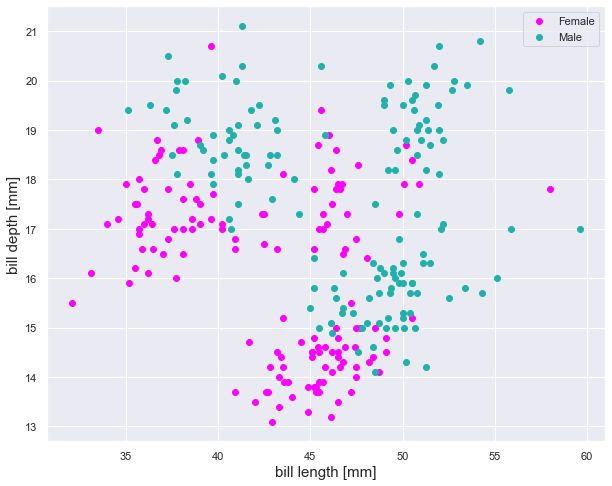

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

df = pd.read_csv("./Datasets/palmer_penguins.csv")

# Import the data
df = df.iloc[50:]

X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Female":
        return 0
    else:
        return 1
         
# Create target value array
y = df["sex"].map(make_labels).to_numpy()

# Plot the data
sex = ["Female", "Male"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for gender, color in zip(sex, colors):
    temp_df = df[df.sex == gender]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = gender, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        55
           1       0.85      0.69      0.77        59

    accuracy                           0.78       114
   macro avg       0.79      0.78      0.78       114
weighted avg       0.79      0.78      0.78       114
 



As you will notice by running the following code cell, the decision regions generated by AdaBoost are distinctly different from those generated by the bagging and random forest algorithms. 

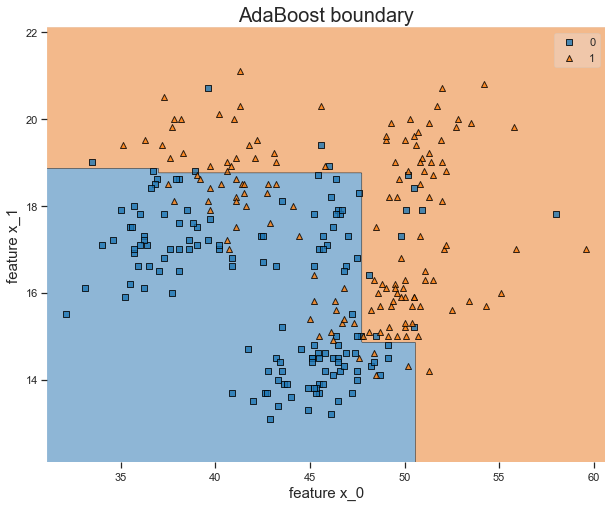

In [13]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.title("AdaBoost boundary", fontsize = 20)
plt.grid()
plt.show()

In [14]:
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        55
           1       0.89      0.81      0.85        59

    accuracy                           0.85       114
   macro avg       0.85      0.85      0.85       114
weighted avg       0.85      0.85      0.85       114
 



---

## Gradient Boosting 
Another popular boosting method is **gradient boosting**. This method works by sequentially adding predictors to an ensemble, each correcting is predecessor. The difference between this method and AdaBoost is that gradient boosting tries to fit the new predictor to the *residual errors* made by the previous predictor. Recall the residual error denoted by $error$. 

Given features ```X``` and regression values ```y```, we train a regression tree ```tree_reg1``` on this dat and then ```tree_reg1``` predicts a vector $\hat{y}_1$ of real values. Then, 

$$
y = \hat{y}_1 + error_1
$$

which implies, 
$$
y - \hat{y}_1 = error_1
$$

Next fit another regression tree, say ```tree_reg2```, with features ```X``` and labels $y_2 = y - \hat{y}1$. Then, ```tree_reg2``` predict a vector $\hat{y}_2$, with 

$$
error_1 = y_2 = \hat{y}_2 + error_2
$$

Thus, 

$$
y = \hat{y}_1 + error_1 = \hat{y}_1 + \hat{y}_2 + error_2, 
$$
where $error_1 > error_2$. This means that we have a better predictor by summing the predictions of ```tree_reg1``` and ```tree_reg2```!


In the following code cells we generate artifical quadratic data and then perform gradient boost with three regression trees. 

---

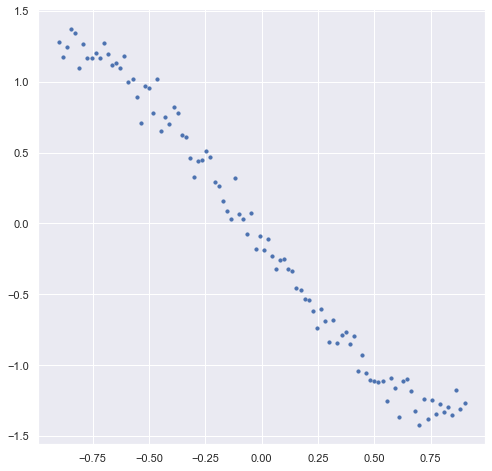

In [15]:
np.random.seed(0)
X = np.linspace(-.9, .9, 100)
y = (X ** 5 - X * 2) + np.random.normal(-.09, .09, 100)
plt.figure(figsize=(8, 8))
plt.scatter(X, y, s=10)
plt.show()

In [16]:
from sklearn.tree import DecisionTreeRegressor

X_new = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)

y2 = y_train - tree_reg1.predict(X_train)

tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_train, y2)

y3 = y2 - tree_reg2.predict(X_train)

tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [17]:
# Optional hard coded final prediction
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

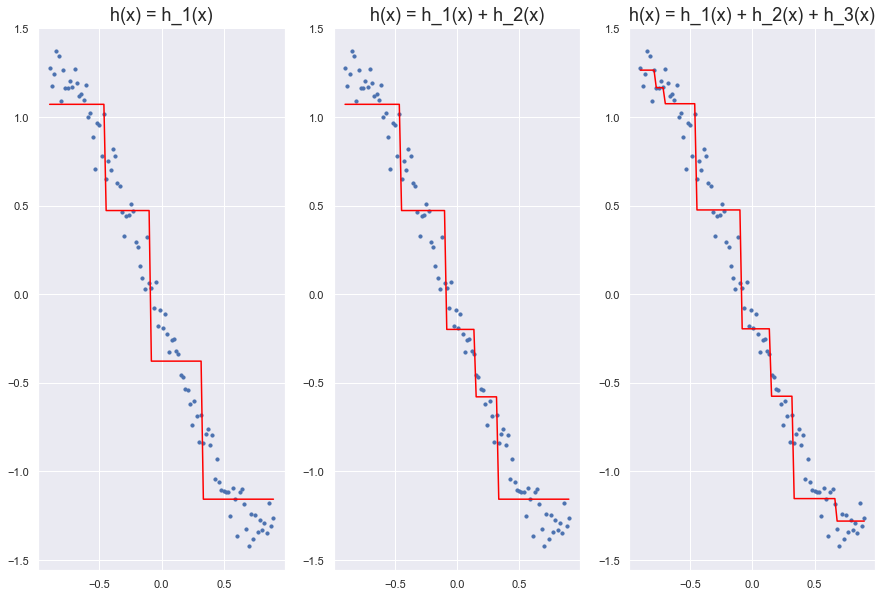

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.scatter(X, y, s=10)
ax1.plot(X, tree_reg1.predict(X_new), color = "red")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)

ax2.scatter(X, y, s=10)
ax2.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new), color = "red")
ax2.set_title("h(x) = h_1(x) + h_2(x)", fontsize = 18)

ax3.scatter(X, y, s=10)
ax3.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new)+tree_reg3.predict(X_new), color = "red")
ax3.set_title("h(x) = h_1(x) + h_2(x) + h_3(x)", fontsize = 18)
plt.show()

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 150, learning_rate=0.2, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_new)

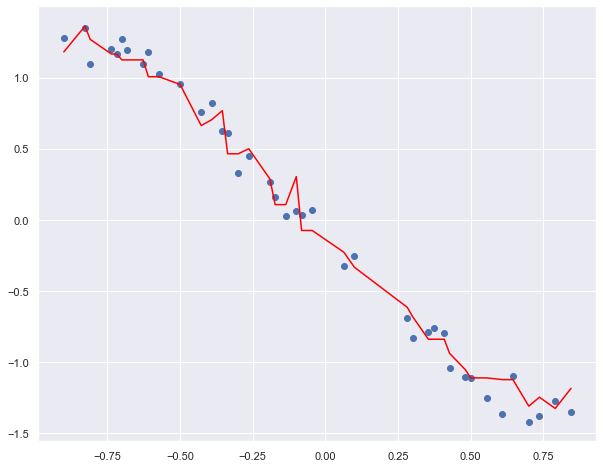

In [20]:
y_pred = gb_reg.predict(X_test)
points = [(x[0], y, z) for x, y, z in zip(X_test, y_pred, y_test)]
points.sort(key = lambda x : x[0])
X_new_test, y_new_pred, y_new_test = np.array([x[0] for x in points]), np.array([x[1] for x in points]), np.array([x[2] for x in points])
X_new_test = X_new_test.reshape(-1, 1)

plt.figure(figsize=(10, 8))
plt.scatter(X_new_test, y_new_test)
plt.plot(X_new_test, y_new_pred, color = "red")
plt.show()